In [15]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [16]:
# load data and make train/test split

# load data
df = pd.read_csv("data/clean/AAPL_feature_engineered.csv")


In [29]:
# split data
output = df["Close"]
features = list(df.drop(["Close","Date", "Quarter"], axis=1).columns)
print(list(features))

['Volume', 'Open', 'High', 'Low', 'Daily_Return', '5_day_mean_close_price', '5_day_mean_volume', 'Daily_Range', 'Volatility', 'EMA_Close_5', 'EMA_Close_20']


In [30]:
from sklearn.preprocessing import MinMaxScaler

#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Volume,Open,High,Low,Daily_Return,5_day_mean_close_price,5_day_mean_volume,Daily_Range,Volatility,EMA_Close_5,EMA_Close_20
0,0.039229,0.994496,0.982184,0.992009,NaN,NaN,NaN,0.285545,NaN,0.990638,0.996143
1,0.027310,1.000000,0.990382,0.999128,0.444526,NaN,NaN,0.304057,NaN,0.992866,0.996786
2,0.047551,0.988937,1.000000,1.000000,0.460237,NaN,NaN,0.430484,NaN,0.998040,0.998432
3,0.016450,0.990327,0.978686,0.998678,0.392600,NaN,NaN,0.141788,NaN,0.998924,0.999182
4,0.018546,0.982266,0.978632,0.995273,0.425448,1.0,0.02733,0.188657,NaN,1.000000,1.000000


In [32]:
from sklearn.model_selection import TimeSeriesSplit

#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output[:len(train_index)].values.ravel(), output[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [33]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [35]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
#from keras.utils.vis_utils import plot_model

#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
#plot_model(lstm, show_shapes=True, show_layer_names=True)

In [36]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)


Epoch 1/100
287/287 [==============================] - 2s 1ms/step - loss: nan
Epoch 2/100
287/287 [==============================] - 0s 1ms/step - loss: nan
Epoch 3/100
287/287 [==============================] - 0s 1ms/step - loss: nan
Epoch 4/100
287/287 [==============================] - 0s 1ms/step - loss: nan
Epoch 5/100
287/287 [==============================] - 0s 1ms/step - loss: nan
Epoch 6/100
287/287 [==============================] - 0s 1ms/step - loss: nan
Epoch 7/100
287/287 [==============================] - 0s 1ms/step - loss: nan
Epoch 8/100
287/287 [==============================] - 0s 1ms/step - loss: nan
Epoch 9/100
287/287 [==============================] - 0s 1ms/step - loss: nan
Epoch 10/100
287/287 [==============================] - 0s 1ms/step - loss: nan
Epoch 11/100
287/287 [==============================] - 0s 1ms/step - loss: nan
Epoch 12/100
287/287 [==============================] - 0s 1ms/step - loss: nan
Epoch 13/100
287/287 [===========================

In [40]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

8/8 [==============================] - 0s 2ms/step


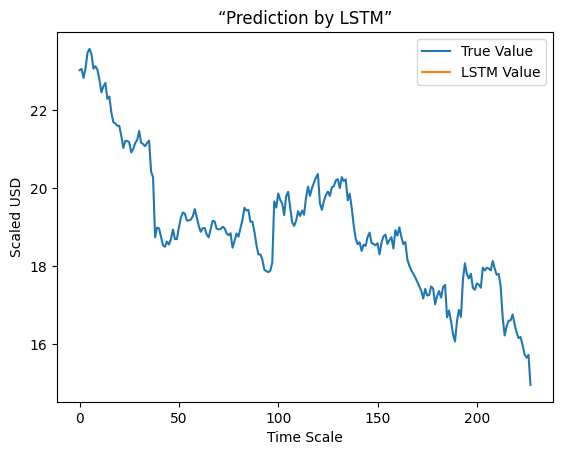

In [41]:
import matplotlib.pyplot as plt

#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('“Prediction by LSTM”')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()